In [23]:

#Andrew J. Miller  - March 28th, 2017 - 22:27

#Bowling Green, KY

#This is the iPython notebook for the Credit Card Fraud main file. Everything will 
#be written and explained in this file. I hope that this helps myself better
#understand the solution to this problem. Hopefully I will learn something.

#Credit: joparga3 for checking my work and providing a framework.

#Thanks!
#Andy



In [24]:
#Let us do as the romans, and import our main libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
#Lets get the data and take a look.
ccf = pd.read_csv("C:/Users/andym/Desktop/AndyMiller/AndyMillerSoftwareDevelopment/DataSets/creditcardfraud.csv")
ccf.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


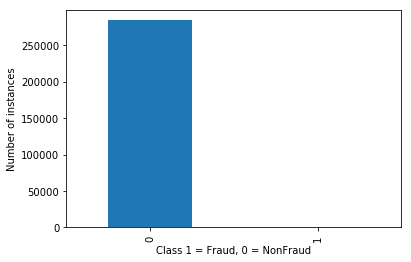

In [26]:
#Looking at the instances of fraud vs the instances of non-fraud
#0 is non-fraud, 1 is fraud.
graphData = ccf['Class'].value_counts().sort_index()
graphData.plot(kind='bar')
plt.title=('Instances of Fraud vs Non-Fraud')
plt.xlabel('Class 1 = Fraud, 0 = NonFraud')
plt.ylabel('Number of instances')

In [27]:
#So we can't see anything so lets just ask with code:
print(ccf['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


-So there are 284,315 instances of normal transactions
-There are also 492 instances of fraud

-Prett imbalanced.
-The approach to solve this is called undersampling. Undersampling, in this
scenario, just means taking all of the fraud instances and picking an equal
number of non-fraud instances. This will make it more obvious to the algorithm
what a fraud is vs what a not-fraud is. It also simplifies the data.
-So ultimately, we're limited by our smallest classification of data, especially
in binary examples. This is may not be obvious at first. But think if you
lived in a world with 2,000,000 cats and one dog. The dog would be different,
but you probably wouldn't have enough information to classify it as a dog, it'd just be some weird thing.

In [28]:
#Amount needs to be normalized, lets check out the bigged transaction first.
#Let's also find the smallest one and the average.
#This is good to know
print("The largest transaction is $",ccf['Amount'].max(), ", nice, a car maybe?")
print("The smallest transaction is $",ccf['Amount'].min(), ", \"yes, i'd like to buy one nothing please.\"")
print("The largest transaction is $ %.2f" % ccf['Amount'].mean(), ", ok, so like a pair of Nike running shoes.")

The largest transaction is $ 25691.16 , nice, a car maybe?
The smallest transaction is $ 0.0 , "yes, i'd like to buy one nothing please."
The largest transaction is $ 88.35 , ok, so like a pair of Nike running shoes.


In [29]:
#So we drop time because it's pretty useless, and we drop the non-normalized amount
#I'm going to keep the original data set in memory, but sometimes this isn't a
#good idea. change ccfN to ccf if you want to be more efficient.
from sklearn.preprocessing import StandardScaler
ccf['nAmount'] = StandardScaler().fit_transform(ccf['Amount'].reshape(-1,1))
ccfN=ccf.drop(['Time', 'Amount'],axis=1)
ccfN.head(10)

print("The largest normalized transaction is $ %.2f" % ccfN['nAmount'].max(), ", This is the new car")
print("The smallest normalized transaction is $ %.2f" %ccfN['nAmount'].min(), ", This is the new 0")
print("The average normalized transaction is $ %.2f" % ccfN['nAmount'].mean(), ", This is the new running shoe")

The largest normalized transaction is $ 102.36 , This is the new car
The smallest normalized transaction is $ -0.35 , This is the new 0
The average normalized transaction is $ 0.00 , This is the new running shoe


C:\Users\andym\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


It's important to notice the change in the average. The 32.36 is just for fun, but we can figure that the new max is around the 7500 dollar, the minimum is obviously probably a couple of cents, and the mean is around the 95 dollar range. So a bit skewed but not too bad.

In [30]:
#Samples in the tiny class
fraudCases = len(ccfN[ccfN.Class==1]) #fraud = 492 pieces
fraudIndices = np.array(ccfN[ccfN.Class==1].index) #tells us the row in array format. For Fraud

nonFraud = len(ccfN[ccfN.Class==0]) #non-fraud = 284,315 pieces
nonFraudIndices = np.array(ccfN[ccfN.Class==0].index) #tells us the row in array format. For non-fraud

#Great but we need an undersampled version of the non-Fraud indices
randNonFraudIndices = np.random.choice(nonFraudIndices, fraudCases, replace=False) #Generates 492 random non-fraud case indices for us.

#Combining and pulling data
UnderSampledIndices = np.concatenate([randNonFraudIndices, fraudIndices]) #Combines the indices.
underSampled_ccfN = ccfN.iloc[UnderSampledIndices,:] #Grabs us the data that our undersampled indices points to

#For training and testing large data:
x=ccfN.ix[:,ccfN.columns != 'Class']
y=ccfN.ix[:,ccfN.columns == 'Class']
#Creates 2 data sets, one with class and indices, (y), and one with attributes and no class, (x)

#Testing new data:
xU=underSampled_ccfN.ix[:,underSampled_ccfN.columns != 'Class'] #x from above just undersampled
yU=underSampled_ccfN.ix[:,underSampled_ccfN.columns == 'Class'] #y from above just undersampled

#Checking new dataset, compare this with the old data.
print("Percent Non-Fraud in Undersampled Data: ", len(randNonFraudIndices)/len(underSampled_ccfN))
print("Percent Fraud in Undersampled Data: ", len(fraudIndices)/len(underSampled_ccfN))
print("Total Cases: ", len(underSampled_ccfN))
print("The largest normalized transaction is $ %.2f" % underSampled_ccfN['nAmount'].max(), ", This is the new car")
print("The smallest normalized transaction is $ %.2f" % underSampled_ccfN['nAmount'].min(), ", This is the new 0")
print("The average normalized transaction is $ %.2f" % underSampled_ccfN['nAmount'].mean(), ", This is the new running shoe")
#It's important to check out the new mean. That is our change in the data due to undersampling
#That is going to cause some form of innacuracy to develop.
#Just a good note, I'm not sure how to deal with it yet.


Percent Non-Fraud in Undersampled Data:  0.5
Percent Fraud in Undersampled Data:  0.5
Total Cases:  984
The largest normalized transaction is $ 8.44 , This is the new car
The smallest normalized transaction is $ -0.35 , This is the new 0
The average normalized transaction is $ 0.08 , This is the new running shoe


In [31]:
#Debugging Block

In [32]:
#Let us train, test, split.
from sklearn.model_selection import train_test_split


#Big data set:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.333)

#checking lengths to make sure they're right:
print("Big data set:")
print("number of x training: ", len(xTrain))
print("number of y training: ",len(yTrain))

print("number of x testing: ", len(xTest))
print("number of y testing: ",len(yTest))

print("Total x: ", len(xTrain)+len(xTest))
print("Total y: ",len(yTrain)+len(yTest))

print(" ")


#Undersampled data set:
xUTrain, xUTest, yUTrain, yUTest = train_test_split(xU,yU,test_size=0.333)

#checking lengths to make sure they're right:
print("Baby data set:")
print("undersampled number of x training: ", len(xUTrain))
print("undersampled number of y training: ",len(yUTrain))

print("undersampled number of x testing: ", len(xUTest))
print("undersampled number of y testing: ",len(yUTest))

print("undersampled Total x: ", len(xUTrain)+len(xUTest))
print("undersampled Total y: ",len(yUTrain)+len(yUTest))
print(" ")


Big data set:
number of x training:  189966
number of y training:  189966
number of x testing:  94841
number of y testing:  94841
Total x:  284807
Total y:  284807
 
Baby data set:
undersampled number of x training:  656
undersampled number of y training:  656
undersampled number of x testing:  328
undersampled number of y testing:  328
undersampled Total x:  984
undersampled Total y:  984
 


In [33]:
#Logistic Regression and Classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [34]:
def getKFoldScores(xData,yData):
    fold = KFold(len(yData),shuffle=False) 


    cParamRange = [0.01,0.1,1,10,100]

    results = pd.DataFrame(index = range(len(cParamRange),2), columns = ['cParam','Mean Recall Score'])
    results['cParam'] = cParamRange

   
    i = 0
    for cParam in cParamRange:
        print('***')
        print('cParam: ', cParam)
        print('***')
        print('')

        recallAccuracies = []
        for iteration, indices in enumerate(fold,start=1):

          
            model = LogisticRegression(C = cParam, penalty = 'l1')


            
            model.fit(xData.iloc[indices[0],:],yData.iloc[indices[0],:].values.ravel())

            
            yUPred = model.predict(xData.iloc[indices[1],:].values)


            recallAccuracy = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recallAccuracies.append(recall_acc)
            print('Iteration ', iteration,'; Recall Score = ', recallAccuracy)

       
        results.ix[j,'Mean Recall Score'] = np.mean(recallAccuracies)
        i += 1
        print('')
        print('Mean Recall Score ', np.mean(recallAccuracies))
        print('')

    bestC = results.loc[results['Mean Recall Score'].idxmax()]['cParam']
    
  
    print('***')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('***')
    
    return bestC
            
        

In [35]:
bestC = getKFoldScores(xUTrain,yUTrain)

***
cParam:  0.01
***



TypeError: 'KFold' object is not iterable

In [ ]:
###I really just couldn't figure the above out right away. So I'm going to skip it for now.

In [36]:
import itertools
def plotConfusionMatrix (cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        1
        
    thresh=cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')
    

Confusion Matrix: 0.907284768212


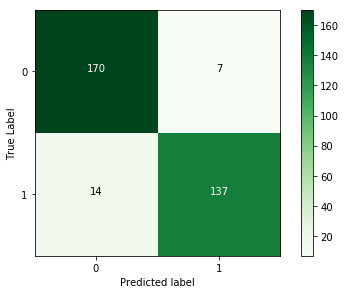

In [41]:
model = LogisticRegression(C=100,penalty='l1')
model.fit(xUTrain,yUTrain.values.ravel())
yUPred = model.predict(xUTest.values)

confMatrix = confusion_matrix(yUTest,yUPred)
np.set_printoptions(precision=2)

print('Confusion Matrix:', confMatrix[1,1]/(confMatrix[1,0]+confMatrix[1,1]))

classNames=[0,1]
plt.figure()
plotConfusionMatrix(confMatrix,classes=classNames)
plt.show()

In [ ]:
#kewl

Confusion Matrix: 0.906976744186


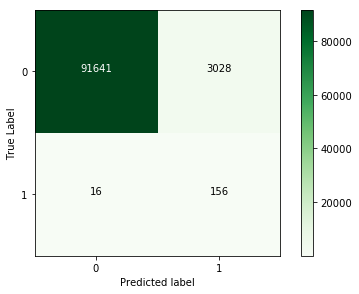

In [50]:
model = LogisticRegression(C=10,penalty='l1')
model.fit(xUTrain,yUTrain.values.ravel())
yPred = model.predict(xTest.values)

confMatrix = confusion_matrix(yTest,yPred)
np.set_printoptions(precision=2)

print('Confusion Matrix:', confMatrix[1,1]/(confMatrix[1,0]+confMatrix[1,1]))

classNames=[0,1]
plt.figure()
plotConfusionMatrix(confMatrix,classes=classNames)
plt.show()

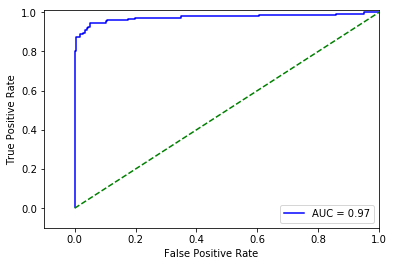

In [63]:
#Plotting ROC Curve, I've never done this.

model = LogisticRegression(C=100, penalty='l1')
yUPredScore = model.fit(xUTrain,yUTrain.values.ravel()).decision_function(xUTest.values)

fpr, tpr, thresholds = roc_curve(yUTest.values.ravel(),yUPredScore)
roc_auc = auc(fpr,tpr)
#ROC Curve plot

#plt.title('Recieve Operating Characteristic Curve')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'g--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
